#### STAT 504 HW3
##### V.A. Suchar
##### 12/09/2015

> Data Set 1: STRONG-R Male Sample_Reduced_2014-03-14.csv (with variables description in  STRONG Codebook.xls). The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism in 3 years.

> 1. Read data in dataframes

In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/vasiles/OneDrive/STAT 504 Python/hw3/dataset1.csv')
print df.head()
# replace missing values with nan's
df1=df.replace(' ', np.NaN)
print df1.head()
# drop nan's
df1=df1.dropna()
print df1.head()

df1['FelRecidYr3']=df1['FelRecidYr3'].astype(float)
df1.describe()

   AgeAsses3RN  AgeAtFirstConvR  JvFelCon  JvVioCon  JvComit  HomConv  \
0            0                0         0         0        0        0   
1            0                0         0         0        0        0   
2            0                0         0         0        0        0   
3            1                0         0         0        0        0   
4            1                0         0         0        0        0   

   SexConv  VProCon  AssaCon  DomVio     ...       CopEmpNd3  CopHouNd3  \
0        2        0        0       0     ...               0          0   
1        0        0        0       0     ...               0          1   
2        2        0        0       0     ...               0          0   
3        0        0        1       0     ...               0          0   
4        0        0        0       0     ...               0          0   

   CopCloNd3  CopFodNd3  CopBugNd3  CopTraNd3  CopHygNd3  CopMedNd3  CopMHNd3  \
0          0          0      

,AgeAsses3RN,AgeAtFirstConvR,JvFelCon,JvVioCon,JvComit,HomConv,SexConv,VProCon,AssaCon,DomVio,...,CopEmpNd3,CopHouNd3,CopCloNd3,CopFodNd3,CopBugNd3,CopTraNd3,CopHygNd3,CopMedNd3,CopMHNd3,FelRecidYr3
count,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,...,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.00000,21373.000000,21373.000000,21373.000000,21373.000000
mean,3.128480,0.840453,0.233472,0.059889,0.029149,0.007954,0.162682,0.088102,0.204651,0.171057,...,0.259580,0.212885,0.084031,0.123988,0.117953,0.15164,0.024189,0.074814,0.092874,0.304777
std,1.177992,0.899132,0.719016,0.266276,0.199292,0.088832,0.443376,0.310999,0.472174,0.428961,...,0.438414,0.409357,0.277441,0.329576,0.322559,0.35868,0.153640,0.263097,0.290263,0.460324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,6.000000,3.000000,5.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


> Use a random seed 1234567, split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable

In [29]:
X=df1.drop('FelRecidYr3',1)
Y=df1.FelRecidYr3

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1234567)

print X_train.shape
print X_test.shape

(16029, 337)
(5344, 337)


> 1. Naive Bayes

In [30]:
import time
# measure process time
t0 = time.clock()

from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
X = X_train
y = y_train
nb.fit(X, y)
nb_pred_rating = nb.predict(X) # class predictions
nb_pred_prob = nb.predict_proba(X)[:, 1]
# rating 5 is col 0 rating 1 is col 1
y_pred_rating=nb.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
nb_10cv_auc = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
print nb_10cv_auc
print nb_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
nb_time=time.clock() - t0

0.699101796407
[ 0.69638404  0.68952618  0.66396509  0.68434186  0.68746101  0.68059888
  0.68913858  0.70162297  0.67290886  0.69787765]
0.686382512336
0.729122707242 seconds process time


> 2. KNN

In [31]:
# measure process time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
X = X_train
y = y_train
knn.fit(X, y)
knn_pred_rating = knn.predict(X) # class predictions
knn_pred_prob = knn.predict_proba(X)[:, 1]

y_pred_rating=knn.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
knn_10cv_auc = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print knn_10cv_auc
print knn_10cv_auc.mean()

print time.clock() - t0, "seconds process time"
knn_time=time.clock() - t0

0.666541916168
[ 0.69326683  0.66957606  0.66022444  0.67373674  0.68059888  0.66999376
  0.65667915  0.67915106  0.6710362   0.66666667]
0.672092979772
226.866412253 seconds process time


> 3. Logistic Regression

In [32]:
t0 = time.clock()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X = X_train
y = y_train
logreg.fit(X, y)
lg_pred_rating = logreg.predict(X) # class predictions

# store the predicted probabilites of class 1
lg_pred_prob = logreg.predict_proba(X)[:, 1]

y_pred_rating=logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_rating)
# 10 fold cross-validation
from sklearn.cross_validation import cross_val_score
lg_10cv_auc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print lg_10cv_auc
print lg_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
lg_time=time.clock() - t0

0.721744011976
[ 0.74625935  0.73316708  0.72755611  0.74173425  0.71366188  0.70742358
  0.73782772  0.72721598  0.73283396  0.73533084]
0.730301074607
37.3135954387 seconds process time


> 4. SVM Polynomial

In [33]:
t0 = time.clock()

from sklearn import svm
svmp = svm.SVC(kernel='poly', C = 1.0, degree=3)
X = X_train
y = y_train
svmp.fit(X,y)
from sklearn.cross_validation import cross_val_score
svmp_10cv_auc = cross_val_score(svmp, X, y, cv=10, scoring='accuracy')
print svmp_10cv_auc
print svmp_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
svmp_time=time.clock() - t0

[ 0.73753117  0.72755611  0.71446384  0.73674361  0.71927636  0.72177168
  0.7309613   0.72409488  0.72409488  0.72908864]
0.726558246324
666.533479497 seconds process time


> 5. SVM Gaussian

In [34]:
# measure process time
t0 = time.clock()

from sklearn import svm
svmg = svm.SVC(kernel='rbf', C = 1.0, gamma=1)
X = X_train
y = y_train
svmg.fit(X,y)
from sklearn.cross_validation import cross_val_score
svmg_10cv_auc = cross_val_score(svmg, X, y, cv=10, scoring='accuracy')
print svmg_10cv_auc
print svmg_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
svmg_time=time.clock() - t0

[ 0.69825436  0.69950125  0.70074813  0.70243294  0.69931379  0.69931379
  0.69912609  0.69975031  0.69912609  0.70224719]
0.699981394008
2704.81551048 seconds process time


> 6. Tree

In [35]:
# measure process time
t0 = time.clock()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
X = X_train
y = y_train
tree.fit(X,y)
from sklearn.cross_validation import cross_val_score
tree_10cv_auc = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print tree_10cv_auc
print tree_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
tree_time=time.clock() - t0

[ 0.70885287  0.70698254  0.70822943  0.70742358  0.69931379  0.69619464
  0.70287141  0.70911361  0.69038702  0.71161049]
0.704097936225
1.78352341917 seconds process time


> 7. Bagging

In [36]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(tree,n_estimators=10, random_state=1)
X = X_train
y = y_train
bag.fit(X,y)
from sklearn.cross_validation import cross_val_score
bag_10cv_auc = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
print bag_10cv_auc
print bag_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
bag_time=time.clock() - t0

[ 0.72007481  0.71446384  0.71633416  0.71990019  0.70929507  0.70929507
  0.71161049  0.71910112  0.70599251  0.70786517]
0.713393243697
13.3094254439 seconds process time


> 8. Random Forest 

In [37]:
# measure process time
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1)
X = X_train
y = y_train
rf.fit(X,y)
from sklearn.cross_validation import cross_val_score
rf_10cv_auc = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print rf_10cv_auc
print rf_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
rf_time=time.clock() - t0

[ 0.71197007  0.71882793  0.71321696  0.724267    0.70305677  0.68683718
  0.73220974  0.72222222  0.69975031  0.70599251]
0.711835069234
4.8575518442 seconds process time


> 9. Noisy replication : STILL NOT WORKING

In [38]:
# set a seed for reproducibility
np.random.seed(1234567)
# create five bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=16029, size=16029, replace=True) for _ in range(1, 6)]
samples
X_train.iloc[samples[0],:]

from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(max_depth=3, random_state=1)
# list for storing predicted price from each tree
predictions = []
# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_new = X_train.iloc[sample[0],:]
    y_train_new = y_train.iloc[sample[0]]
    tree2.fit(X_train_new, y_train_new)
    y_pred = tree2.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

# INCOMPLETE?NOT WORKING!!!!!!!!!!!

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

> 10. AdaBoost classifier
>
> An AdaBoost classifier is a meta-estimator that begins by fitting a classifier
> on the original dataset and then fits additional copies of the classifier on 
> the same dataset but where the weights of incorrectly classified instances are 
> adjusted such that subsequent classifiers focus more on difficult cases
> measure process time

In [39]:
t0 = time.clock()

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10, random_state=1)
X = X_train
y = y_train
ada.fit(X,y)
from sklearn.cross_validation import cross_val_score
ada_10cv_auc = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print ada_10cv_auc
print ada_10cv_auc.mean()


print time.clock() - t0, "seconds process time"
ada_time=time.clock() - t0

[ 0.71072319  0.71633416  0.71321696  0.72613849  0.70056145  0.70430443
  0.71473159  0.70973783  0.70287141  0.72409488]
0.712271438639
5.91747099206 seconds process time


> PLOTS

In [40]:
t0 = time.clock()

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# NB:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
nb_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
nb_fpr, nb_tpr, nb_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# KNN:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# LG:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
logreg_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, y_pred_prob)
#TREE:
y_pred_prob = tree.predict_proba(X_test)[:, 1]
tree_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
tree_fpr, tree_tpr, tree_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# BAG:
y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# RF:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
rf_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, y_pred_prob)
# ADA:
y_pred_prob = ada.predict_proba(X_test)[:, 1]
ada_auc=metrics.roc_auc_score(y_test, y_pred_prob)
#print metrics.roc_auc_score(y_test, y_pred_prob)
ada_fpr, ada_tpr, ada_thresholds = metrics.roc_curve(y_test, y_pred_prob)

print time.clock() - t0, "seconds process time"
plot_time=time.clock() - t0

49.9863184688 seconds process time


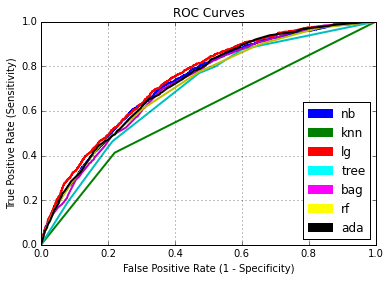

In [47]:
%matplotlib inline
plt.plot(nb_fpr, nb_tpr, knn_fpr, knn_tpr, lg_fpr, lg_tpr, tree_fpr, tree_tpr, bag_fpr, bag_tpr, rf_fpr, rf_tpr,ada_fpr, ada_tpr, linewidth=2.0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
nb = mpatches.Patch(color='blue', label='nb')
knn= mpatches.Patch(color='green', label='knn')
lg = mpatches.Patch(color='red', label='lg')
tree = mpatches.Patch(color='cyan', label='tree')
bag = mpatches.Patch(color='magenta', label='bag')
rf = mpatches.Patch(color='yellow', label='rf')
ada= mpatches.Patch(color='black', label='ada')
plt.legend(handles=[nb,knn,lg,tree,bag,rf,ada], loc=4)
plt.grid(True)

> Tabulate the 10cv_auc.means

In [48]:
print nb_10cv_auc.mean()
print nb_time
print knn_10cv_auc.mean()
print knn_time
print lg_10cv_auc.mean()
print lg_time
print tree_10cv_auc.mean()
print tree_time
print bag_10cv_auc.mean()
print bag_time
print rf_10cv_auc.mean()
print rf_time
print svmp_10cv_auc.mean()
print svmp_time
print svmg_10cv_auc.mean()
print svmg_time
print ada_10cv_auc.mean() 
print ada_time

0.686382512336
0.729211154357
0.672092979772
226.866542056
0.730301074607
37.3136497748
0.704097936225
1.78358198142
0.713393243697
13.3094791763
0.711835069234
4.85760859525
0.726558246324
666.533545908
0.699981394008
2704.81556512
0.712271438639
5.91752713938


> Methods are comparable: AUC~70%.
> But there are significant differences when it comes to computation time: KNN and SVM taking the longest.